In [6]:
directory= "kfold"
domainList = ["art_painting","cartoon","photo","sketch"]
all_data_path=[]
for domain_name in domainList:
    with open(f'{domain_name}_to_label.txt') as f:
        lines = f.readlines()
        for line in lines:
            all_data_path.append( str(line.split()[0]))

In [5]:
len(all_data_path)

400

In [ ]:
import json
f = open('labelFile.json')
data = json.load(f)

In [1]:
import json
import pandas as pd
f = open('labelFile.json')
data = json.load(f)


columns = ['Level of details','Edges','Color saturation',
           'Color shades','Background','Single instance',
           'Text','Texture','Perspective']
info = pd.DataFrame(data, columns=columns)



for each group find uniqe discriptions and usethem to label are files

In [2]:
artpaintDescriptions=[]
cartoonDescriptions=[]
photoDescriptions=[]
sketchDescriptions=[]
for info in data:
    if str(info["image_name"]).startswith("art_painting"):
        artpaintDescriptions.append(info["descriptions"])
    elif str(info["image_name"]).startswith("cartoon"):
        cartoonDescriptions.append(info["descriptions"])
    elif str(info["image_name"]).startswith("photo"):
        photoDescriptions.append(info["descriptions"])
    else:
        sketchDescriptions.append(info["descriptions"])



In [3]:
import pandas as pd
columns = ['Level of details','Edges','Color saturation',
           'Color shades','Background','Single instance',
           'Text','Texture','Perspective']
artPaintingDf = pd.DataFrame(artpaintDescriptions, columns=columns)
photoDf = pd.DataFrame(photoDescriptions, columns=columns)
cartoonDf = pd.DataFrame(cartoonDescriptions, columns=columns)
sketchDf = pd.DataFrame(sketchDescriptions, columns=columns)

In [22]:
sketchDf["Level of details"].unique()


array(['low level details', 'low-level details'], dtype=object)

In [24]:
import numpy
sketchDf["Background"].unique()

# numpy.concatenate( hi,axis=0)

array(['monochrome white', 'plain, white'], dtype=object)

In [20]:
sketchDf["Texture"].unique()

array(['without texture'], dtype=object)

In [15]:
photoDf["Perspective"].unique()

array(['with perspective, realistic', 'realistic', 'without perspective',
       'compressed', 'with perspective'], dtype=object)

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pytesseract

In [5]:
def checkColorShade(img):
    b,g,r=cv.split(img)
    r_g=np.count_nonzero(abs(r-g))
    r_b=np.count_nonzero(abs(r-b))
    g_b=np.count_nonzero(abs(g-b))

### sum of differences
    diff_sum=float(r_g+r_b+g_b)

### finding ratio of diff_sum with respect to size of image
    ratio=diff_sum/img.size

    if ratio>0.005:
        
        print("Yes, colorful")
        return "Yes, colorful"
       
        
    else:
        print("no, grayscale")
        return "no, grayscale"
    

In [6]:
def getImagedetail(path):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    img = cv.imread(path)
    assert img is not None, "file could not be read, check with os.path.exists()"
    color = ('b','g','r')
    sum=0
    for i,col in enumerate(color):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        hi = np.unique(histr,axis=0).size

        ax1.plot(histr,color = col)
        ax1.set_title(f'RGB representation')
#         ax1.xlim([0,256])
        sum += hi
    
    color = ('c','m','y')
    sum1=0
    img2 = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    for i,col in enumerate(color):
        histr = cv.calcHist([img2],[i],None,[256],[0,256])
        hi = np.unique(histr,axis=0).size
        ax1.set_title(f'HSV representation')
        ax2.plot(histr,color = col)
#         ax2.xlim([0,256])
        sum1 += hi
    plt.xlim([0,256])
    plt.show()

       
    # image properties
    print("Type:",type(img))
    print("Shape of Image:", img.shape)
    print('Total Number of pixels:', img.size)
    print("Image data type:", img.dtype) 
    print("Dimension:", img.ndim)
    print("colorUsed", sum)
    saturation = img2[:, :, 1].mean()
    print("image Saturation", saturation)
    imgHLS = cv.cvtColor(img, cv.COLOR_BGR2HLS)
    lightness =imgHLS[:,:,1].mean()
#     closer too 250-255 more white  
    print("image lightness", lightness)
    img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    imageShade=checkColorShade(img)
    text = pytesseract.image_to_string(img_grey)
    print(len(text))
    return saturation, lightness,imageShade,len(text)
#     text = pytesseract.image_to_boxes(img)
#     print(text)
    

    


In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


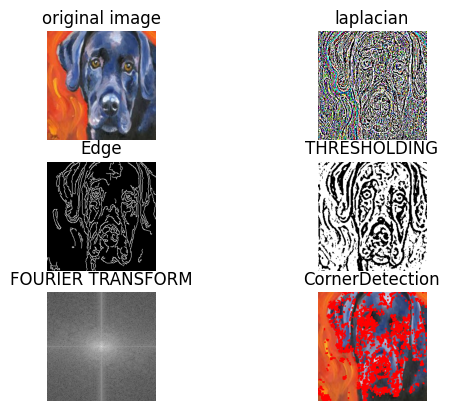

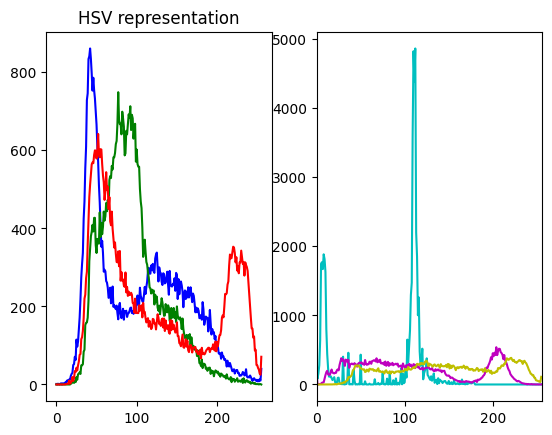

Type: <class 'numpy.ndarray'>
Shape of Image: (227, 227, 3)
Total Number of pixels: 154587
Image data type: uint8
Dimension: 3
colorUsed 528
image Saturation 110.66191853131247
image lightness 110.61349919462826
Yes, colorful


TesseractNotFoundError: C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe is not installed or it's not in your PATH. See README file for more information.

In [11]:
# label artwork
artworkLost=[]
detailList =["high","mid","low"]
backgroundList = ["monochrome","white","colorful"]
EdgesList = ["definite","precise","neat brush strokes"]
for i in range(100):
    fig, axs = plt.subplots(3, 2)
    img = cv.imread("kfold/"+all_data_path[i])
    axs[0,0].set_title(f'original image')
    axs[0,0].axis('off')
    axs[0,0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    
    axs[0,1].set_title(f'laplacian')
    axs[0,1].axis('off')
    laplacian = cv.Laplacian(img, cv.CV_64F)
    axs[0,1].imshow(cv.cvtColor(laplacian.astype('float32'), cv.COLOR_BGR2RGB))
    
    
    axs[1,0].set_title(f'Edge')
    axs[1,0].axis('off')
    edges = cv.Canny(img, threshold1 = 100, threshold2 = 200)
    axs[1,0].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
    
    
    axs[1,1].set_title(f'THRESHOLDING')
    axs[1,1].axis('off')
    denoised_img = cv.medianBlur(img, 5)
    hi = denoised_img.astype(np.uint8)
    img_grey = cv.cvtColor(hi, cv.COLOR_BGR2GRAY)
    th = cv.adaptiveThreshold(img_grey, maxValue = 255, 
                               adaptiveMethod = cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                               thresholdType = cv.THRESH_BINARY, blockSize = 11, C = 2)
    axs[1,1].imshow(cv.cvtColor(th, cv.COLOR_BGR2RGB))
    axs[2,0].set_title(f'FOURIER TRANSFORM')
    axs[2,0].axis('off')
    freq = np.fft.fft2(img_grey)
    freq_shift = np.fft.fftshift(freq)
    magnitude_spectrum = 30 * np.log(np.abs(freq_shift))
    axs[2,0].imshow(magnitude_spectrum,cmap = 'gray')
    axs[2,1].set_title(f'CornerDetection')
    axs[2,1].axis('off')
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
   
    gray = np.float32(gray)
    corners = cv.cornerHarris(gray, blockSize = 2, ksize = 3, k = 0.04)
    corners = cv.dilate(corners, None)
    img_copy = img.copy()
    imageCornerCount = np.count_nonzero(img_copy[corners > 0.0001 * corners.max()])
    img_copy[corners > 0.0001 * corners.max()] = [0, 0, 255]
    axs[2,1].imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
    plt.show()
    saturation,lighting,shad,textLen=getImagedetail("kfold/"+all_data_path[i])
    print(f'number of Corners:{imageCornerCount}' )
    imageDic = dict()
    imageDic["image_name"]=all_data_path[i]
    descriptions=[]
    detailLevel=int(input("Please enter DetailLevel/0,1,2"))
    descriptions.append(f'{detailList[detailLevel]}-level')
    edgeState=int(input("Please enter Edges(definite/precise/neat brush strokes)(0,1,2)"))
    descriptions.append(EdgesList[edgeState])
    calorShade=input("vivid colors, light reflections)")
    if saturation>200:
        descriptions.append(f'high saturation, {calorShade}')
    elif saturation<200:
        descriptions.append(f'low saturation, {calorShade}')
    else:
        descriptions.append(f'mid saturation, {calorShade}')
    descriptions.append(shad)
    background=int(input("monochrome/white/colorful(0,1,2)"))
    descriptions.append(backgroundList[background])
    
    text = input("Single instance(y/n)")
    if text == "n":
        text = input("number Insance")
        descriptions.append(f'no, {text}')
    else:
        descriptions.append("yes")
    text = input("is text(y/n)")
    if textLen!=0 or text=="y":
        text = input("is text(d/s)")
        if text == "d":
            descriptions.append(f'yes, dense text')
        else:
            descriptions.append(f'yes, sparse text')
    else:
         descriptions.append("no")
    text = input("visual patter")
    descriptions.append(text)
    text = input("Perspective(y/n)")
    if text == "n":
        descriptions.append(f'no, unrealistic')
    else:
        descriptions.append('yes')
    print(descriptions)
    imageDic["descriptions"]=descriptions
    artworkLost.append(imageDic)


In [ ]:
!pip install opencv-python


In [ ]:
artworkLost
   